In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [ ]:
#Carga de dataset
data = pd.read_csv('/content/Smart watch prices.csv')

In [ ]:
print(data)

        Brand           Model Operating System                Connectivity  \
0       Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1     Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2      Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
3      Fitbit         Versa 3        Fitbit OS            Bluetooth, Wi-Fi   
4      Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   
..        ...             ...              ...                         ...   
374  Withings       ScanWatch      Withings OS            Bluetooth, Wi-Fi   
375      Zepp               Z          Zepp OS  Bluetooth, Wi-Fi, Cellular   
376     Honor    Watch GS Pro          Lite OS            Bluetooth, Wi-Fi   
377      Oppo      Watch Free          ColorOS            Bluetooth, Wi-Fi   
378  TicWatch           Pro 3          Wear OS  Bluetooth, Wi-Fi, Cellular   

    Display Type  Display Size (inches) Resolution Water Resist

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [ ]:
columnas_eliminar = ['Price (USD)']
simbolo = '$'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [ ]:
print(data)

        Brand           Model Operating System                Connectivity  \
0       Apple  Watch Series 7          watchOS  Bluetooth, Wi-Fi, Cellular   
1     Samsung  Galaxy Watch 4          Wear OS  Bluetooth, Wi-Fi, Cellular   
2      Garmin          Venu 2        Garmin OS            Bluetooth, Wi-Fi   
3      Fitbit         Versa 3        Fitbit OS            Bluetooth, Wi-Fi   
4      Fossil           Gen 6          Wear OS            Bluetooth, Wi-Fi   
..        ...             ...              ...                         ...   
374  Withings       ScanWatch      Withings OS            Bluetooth, Wi-Fi   
375      Zepp               Z          Zepp OS  Bluetooth, Wi-Fi, Cellular   
376     Honor    Watch GS Pro          Lite OS            Bluetooth, Wi-Fi   
377      Oppo      Watch Free          ColorOS            Bluetooth, Wi-Fi   
378  TicWatch           Pro 3          Wear OS  Bluetooth, Wi-Fi, Cellular   

    Display Type  Display Size (inches) Resolution Water Resist

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [ ]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Price (USD)'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price                      372 non-null    float64
dtypes: float64(2), object(11)
memory usage: 38.6+ KB


In [ ]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [ ]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:
#Fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [ ]:
#resultado
print(data)

     Brand  Model  Operating System  Connectivity  Display Type  \
0        1    127                34             2            17   
1       30     36                31             2             0   
2        8    105                 9             1             0   
3        6    109                 7             1             0   
4        7     43                31             1             0   
..     ...    ...               ...           ...           ...   
374     38     79                32             1            16   
375     41    132                33             2             0   
376      9    119                12             1             0   
377     26    118                 5             1             0   
378     35     71                31             2             0   

     Display Size (inches)  Resolution  Water Resistance (meters)  \
0                     1.90          27                          5   
1                     1.40          31                   

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      379 non-null    int64  
 1   Model                      379 non-null    int64  
 2   Operating System           379 non-null    int64  
 3   Connectivity               379 non-null    int64  
 4   Display Type               379 non-null    int64  
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 379 non-null    int64  
 7   Water Resistance (meters)  379 non-null    int64  
 8   Battery Life (days)        379 non-null    int64  
 9   Heart Rate Monitor         379 non-null    int64  
 10  GPS                        379 non-null    int64  
 11  NFC                        379 non-null    int64  
 12  Price                      372 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 38.6 KB


In [ ]:
#llenar datos vacios
columnas_especificas = ['Price', 'Display Size (inches)']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      379 non-null    int64  
 1   Model                      379 non-null    int64  
 2   Operating System           379 non-null    int64  
 3   Connectivity               379 non-null    int64  
 4   Display Type               379 non-null    int64  
 5   Display Size (inches)      379 non-null    float64
 6   Resolution                 379 non-null    int64  
 7   Water Resistance (meters)  379 non-null    int64  
 8   Battery Life (days)        379 non-null    int64  
 9   Heart Rate Monitor         379 non-null    int64  
 10  GPS                        379 non-null    int64  
 11  NFC                        379 non-null    int64  
 12  Price                      379 non-null    float64
dtypes: float64(2), int64(11)
memory usage: 38.6 KB


In [ ]:
# Lectura de Datos
X = data.iloc[:, :12]
y = data.iloc[:, 12]
m = y.size

In [ ]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Operating System  Connectivity  Display Type  \
0        1    127                34             2            17   
1       30     36                31             2             0   
2        8    105                 9             1             0   
3        6    109                 7             1             0   
4        7     43                31             1             0   
..     ...    ...               ...           ...           ...   
374     38     79                32             1            16   
375     41    132                33             2             0   
376      9    119                12             1             0   
377     26    118                 5             1             0   
378     35     71                31             2             0   

     Display Size (inches)  Resolution  Water Resistance (meters)  \
0                     1.90          27                          5   
1                     1.40          31                   

In [ ]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

# Normaliza entre -0.5 y 0.5 (revisar) porque se dan valores negativos y postivos

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

     Brand  Model  Operating System  Connectivity  Display Type  \
0        1    127                34             2            17   
1       30     36                31             2             0   
2        8    105                 9             1             0   
3        6    109                 7             1             0   
4        7     43                31             1             0   
..     ...    ...               ...           ...           ...   
374     38     79                32             1            16   
375     41    132                33             2             0   
376      9    119                12             1             0   
377     26    118                 5             1             0   
378     35     71                31             2             0   

     Display Size (inches)  Resolution  Water Resistance (meters)  \
0                     1.90          27                          5   
1                     1.40          31                   

In [ ]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -1.32045185  1.49212186 ... -0.05143445  0.27766774
   0.4253501 ]
 [ 1.          0.89833523 -0.83910309 ... -0.05143445  0.27766774
   0.4253501 ]
 [ 1.         -0.78488255  0.92852902 ... -0.05143445  0.27766774
  -2.26144469]
 ...
 [ 1.         -0.70837265  1.28717901 ... -0.05143445  0.27766774
   0.4253501 ]
 [ 1.          0.59229563  1.26156115 ... -0.05143445 -3.35116244
   0.4253501 ]
 [ 1.          1.28088472  0.05752189 ... -0.05143445  0.27766774
   0.4253501 ]]


In [ ]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

theta calculado por el descenso por el gradiente: [289.61824529 -20.09873214 -23.97739838  14.17835718  12.51013513
  32.6045609   14.2872123  -18.96696331 -43.91754318 -16.48734148
  -3.12191316  35.03333889   4.70350868]
El valor predecido es (usando el descenso por el gradiente): 350.0465


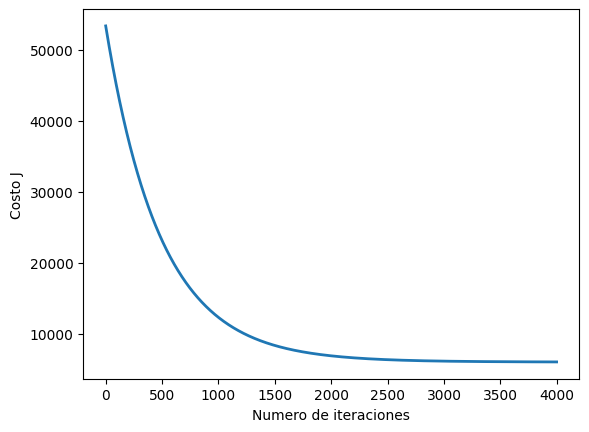

In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # si es grande se resta más a los thetas, si es menor alfa va cambiando poco a poco
#se necesitan muchas iteraciones, si es grande el alfa salta mucho y no llega facilmente
# mejores alfas = 0.1, 0.01, 0.001, 0.0001, 0.0005
num_iters = 4000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(13)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 2, 130, 32, 1, 17, 1.48, 29, 4, 12, 0, 1, 1]
X_array[1:13] = (X_array[1:13] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [ ]:
X_array = [1, 2, 130, 32, 1, 17, 1.48, 29, 4, 12, 0, 1, 1]
X_array[1:13] = (X_array[1:13] - mu) / sigma

In [ ]:
X_array[1:13]

[-1.2439419470989352,
 1.5689754318326286,
 0.9792781840162572,
 -0.3771728032399776,
 1.0932811569154612,
 0.5363648088121512,
 0.7473047451998474,
 -0.594821513259398,
 0.19811839457082608,
 -0.05143444998736397,
 0.2776677449836892,
 0.42535009791885303]

In [ ]:
#Carga de dataset
data = pd.read_csv('/content/Smart watch prices.csv')

In [ ]:
columnas_eliminar = ['Price (USD)']
simbolo = '$'

for columna in columnas_eliminar:
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [ ]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Price (USD)'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
data.drop(columna_categorica, axis=1, inplace=True)

In [ ]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns
#variables fechas
columnas_fechas = data.select_dtypes(include=['datetime64']).columns

In [ ]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [ ]:
#llenar datos vacios
columnas_especificas = ['Price', 'Display Size (inches)']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [ ]:
# Generar un nuevo dataset con la columna movida
nuevo_dataset = data.copy()

# Guardar el nuevo DataFrame en un archivo CSV
nuevo_dataset.to_csv('watches_price.csv', index=False)

print("Archivo 'watches_price.csv' creado exitosamente.")

Archivo 'watches_price.csv' creado exitosamente.


In [ ]:
#Carga de dataset
data = pd.read_csv('/content/watches_price.csv')

In [ ]:
print(data)

     Brand  Model  Operating System  Connectivity  Display Type  \
0        1    127                34             2            17   
1       30     36                31             2             0   
2        8    105                 9             1             0   
3        6    109                 7             1             0   
4        7     43                31             1             0   
..     ...    ...               ...           ...           ...   
374     38     79                32             1            16   
375     41    132                33             2             0   
376      9    119                12             1             0   
377     26    118                 5             1             0   
378     35     71                31             2             0   

     Display Size (inches)  Resolution  Water Resistance (meters)  \
0                     1.90          27                          5   
1                     1.40          31                   

In [ ]:
# Lectura de Datos
X = data.iloc[:, :12]
y = data.iloc[:, 12]
m = y.size

In [ ]:
print(X)
print('*'*25)
print(y)

     Brand  Model  Operating System  Connectivity  Display Type  \
0        1    127                34             2            17   
1       30     36                31             2             0   
2        8    105                 9             1             0   
3        6    109                 7             1             0   
4        7     43                31             1             0   
..     ...    ...               ...           ...           ...   
374     38     79                32             1            16   
375     41    132                33             2             0   
376      9    119                12             1             0   
377     26    118                 5             1             0   
378     35     71                31             2             0   

     Display Size (inches)  Resolution  Water Resistance (meters)  \
0                     1.90          27                          5   
1                     1.40          31                   

In [ ]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [ ]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios

X_array = [1, 1, 128, 33, 2, 17, 1.8, 28, 4, 9, 0, 1, 1]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [351.41756009  -1.73375963  -0.63918384   1.5095825   19.69057974
   3.38618598  83.30479077  -2.43386481 -49.00284191  -2.58375784
 -29.85108901 130.21313908  12.64119062]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $420
